### BANK MARKETING: 

Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

### Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

### Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
### Dataset Attributes
Here is the description of all the variables:

•	Variable: Definition

•	ID: Unique client ID

•	age: Age of the client

•	job: Type of job

•	marital: Marital status of the client

•	education: Education level

•	default: Credit in default.

•	housing: Housing loan

•	loan: Personal loan

•	contact: Type of communication

•	month: Contact month

•	day_of_week: Day of week of contact

•	duration: Contact duration

•	campaign: number of contacts performed during this campaign to the client

•	pdays: number of days that passed by after the client was last contacted

•	previous: number of contacts performed before this campaign

•	poutcome: outcome of the previous marketing campaign

### Output variable (desired target):

•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)



Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv
•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [67]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')


In [68]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [69]:
df_test=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


# Describing the Data
### We're having 2 datasets one is df which is for training the model and on the other hand we have df_test for model testing

In [70]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [71]:
df_test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [73]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [74]:
df.isnull().sum()


ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [75]:
df_test.isnull().sum()


ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

##### There is no null value present in both datasets

# Exploratory Data Analysis (EDA)

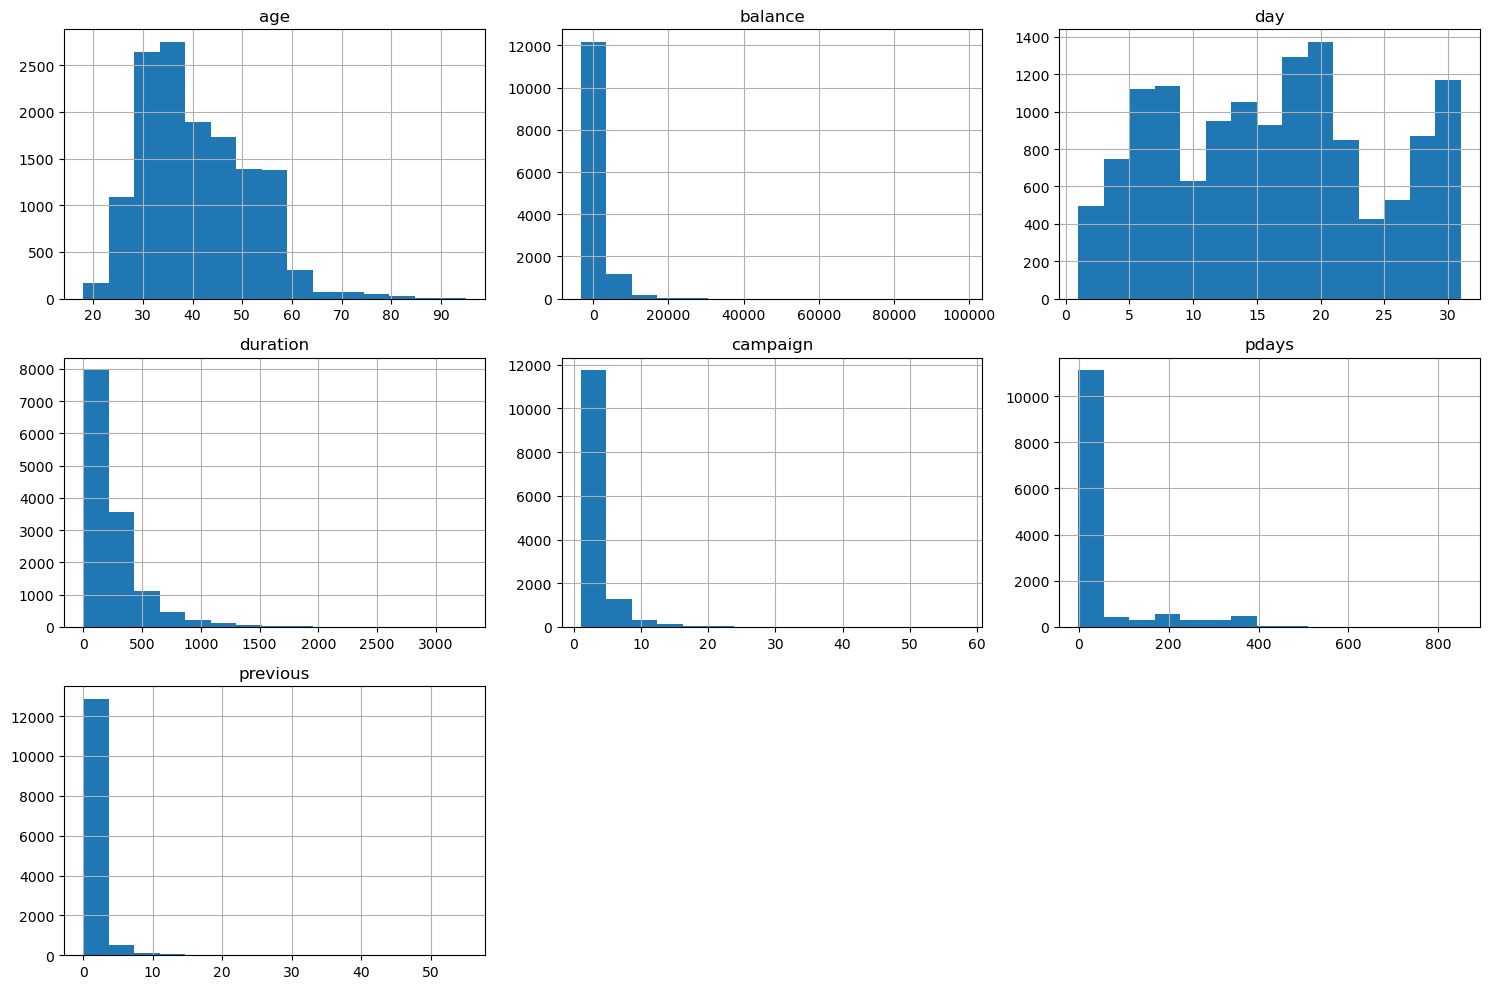

In [76]:
#For Test Dataset
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df_test[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

1. Age: Most customers are between 20 and 40 years old.
2. Balance: Highly skewed right; most customers have low balances.
3. Day: Fairly uniform contact distribution across the month.
4. Duration: Skewed right; most contact durations are short.
5. Campaign: Most customers contacted fewer than 10 times.
6. Pdays: Skewed right; most customers have a pdays value of 0.
7. Previous: Most customers contacted only once in previous campaigns.

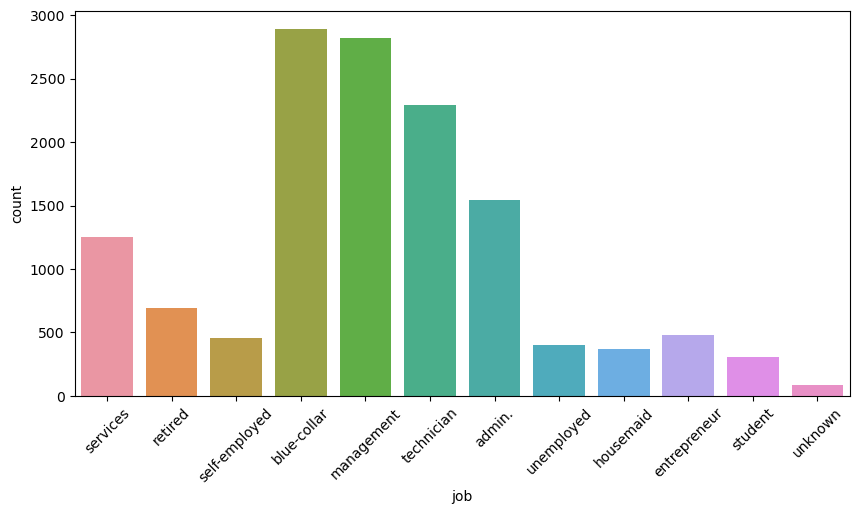

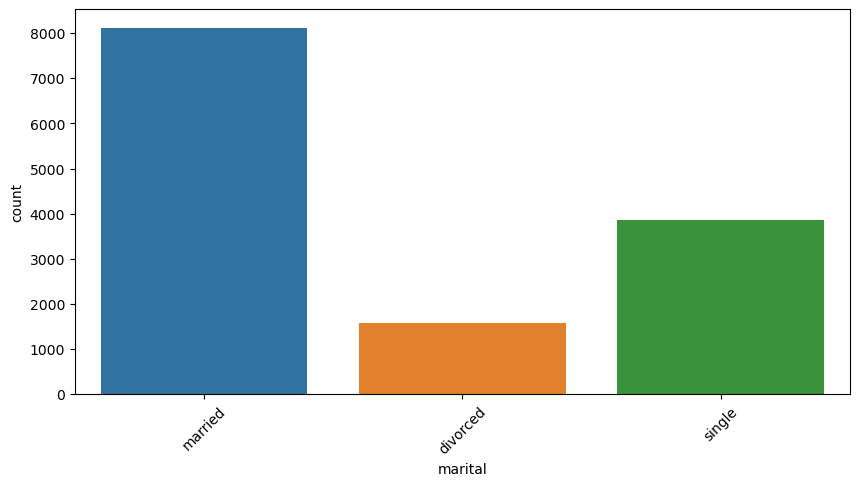

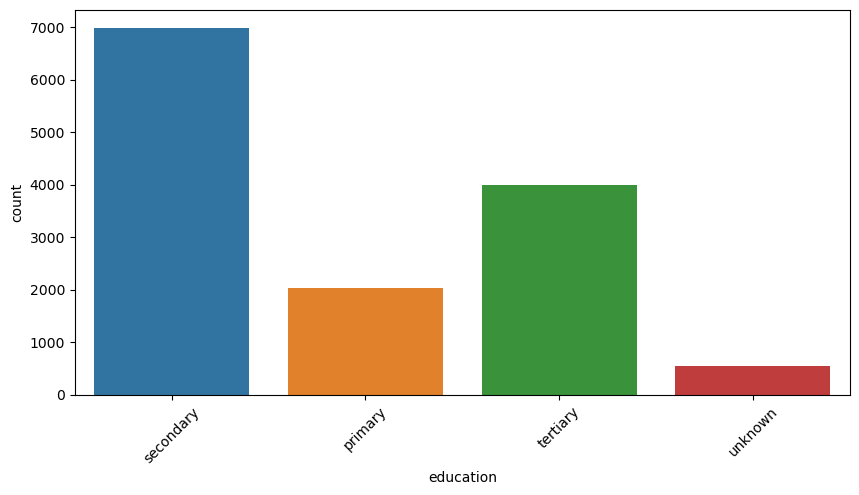

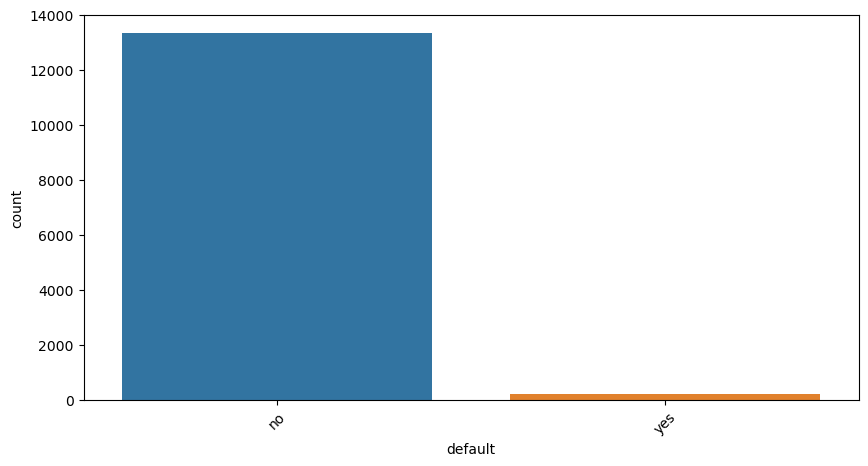

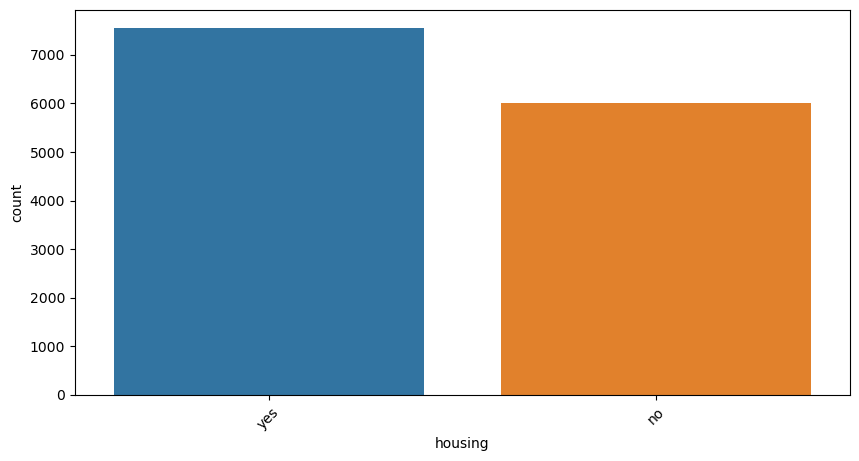

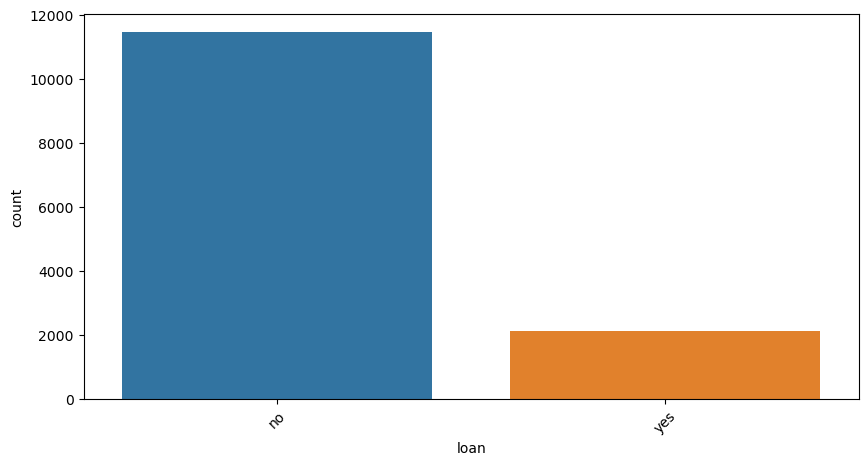

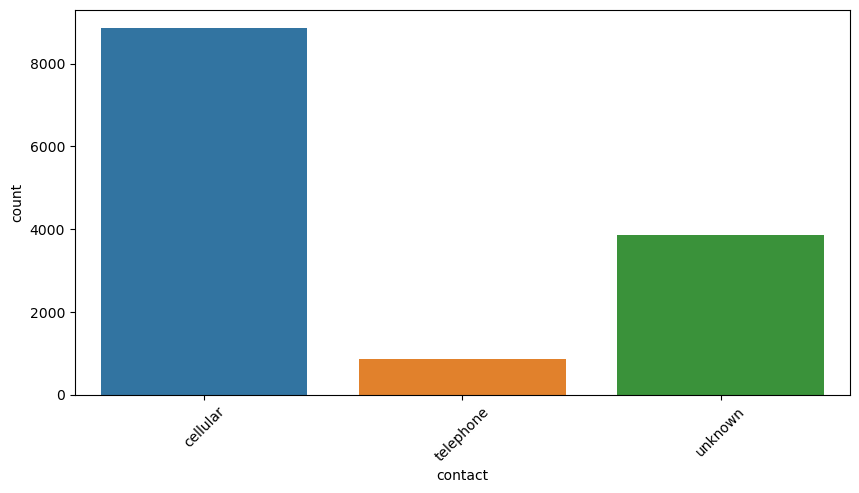

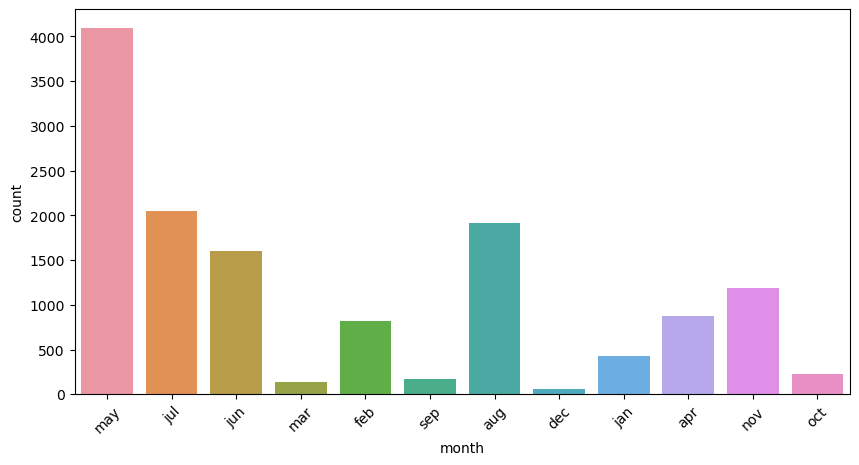

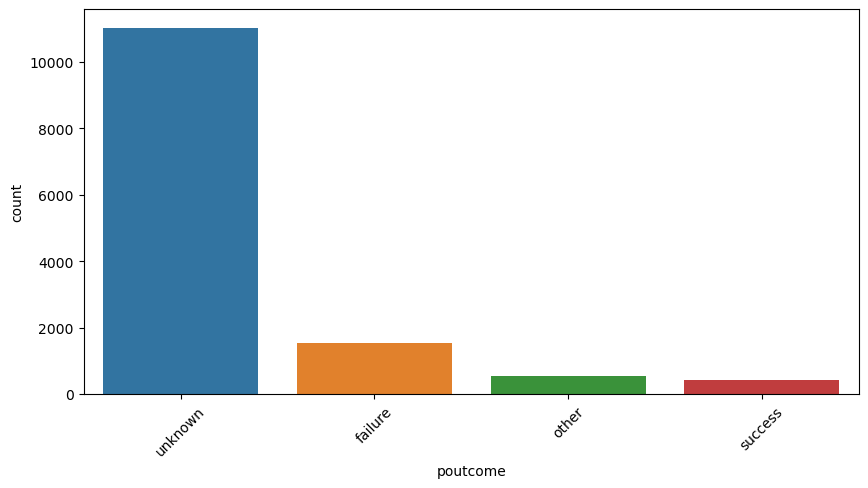

In [77]:
#For Test Dataset
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_test, x=col)
    plt.xticks(rotation=45)
    plt.show()

##### These are the counts of every category of the categorical feature in the Test Dataset.

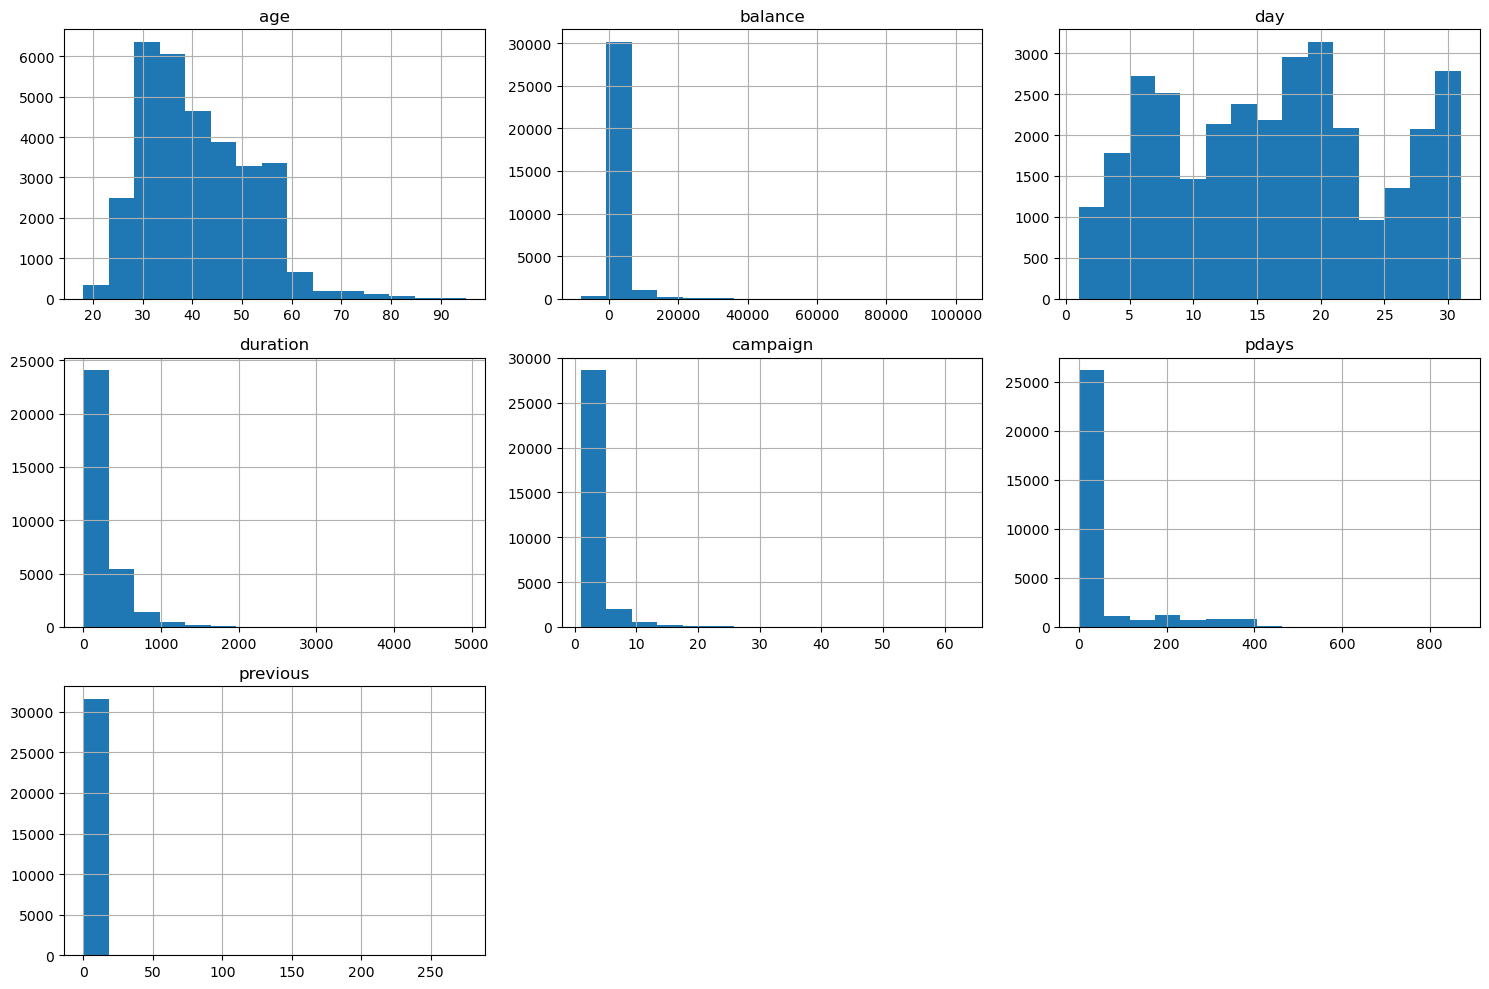

In [78]:
#For Train Dataset
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

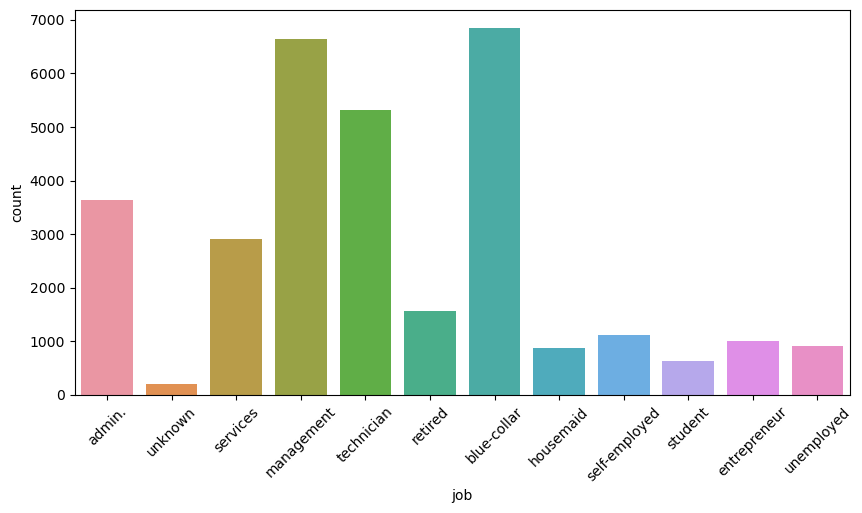

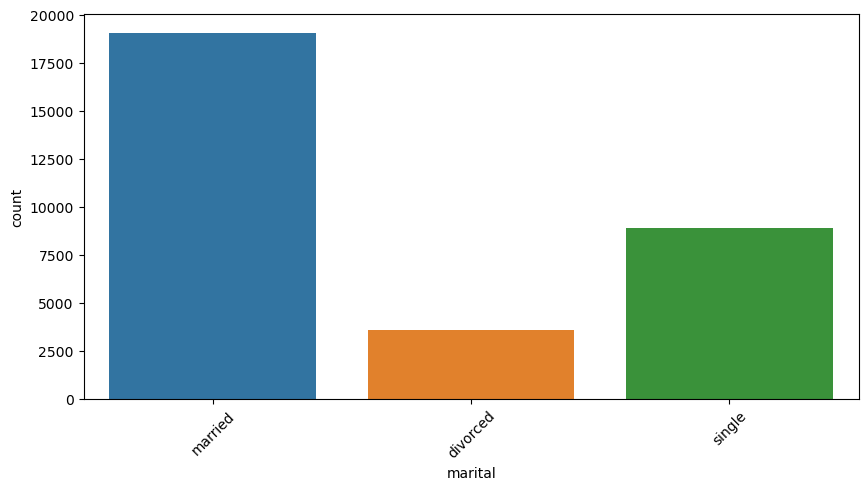

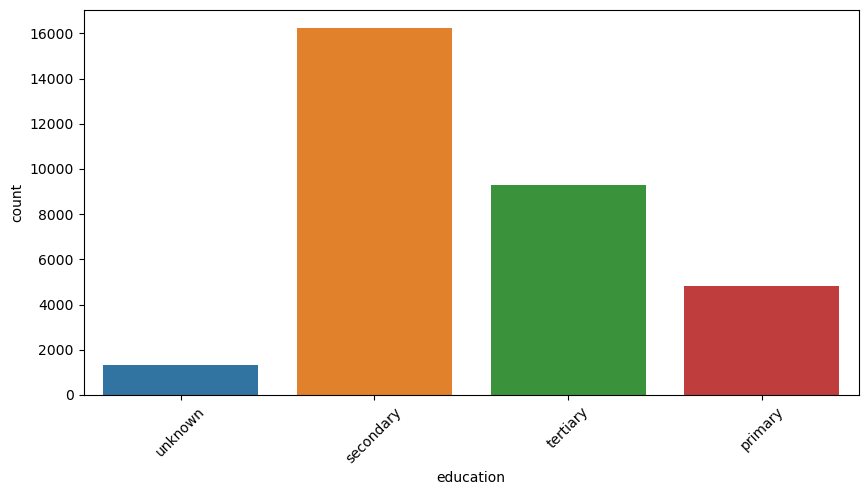

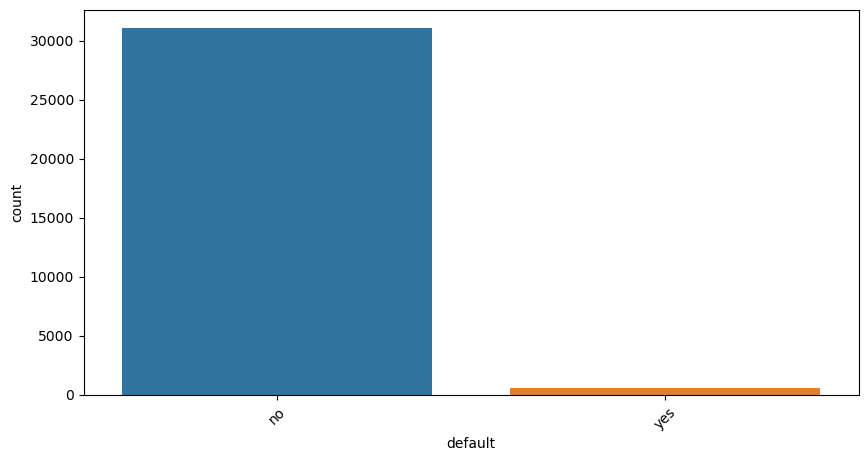

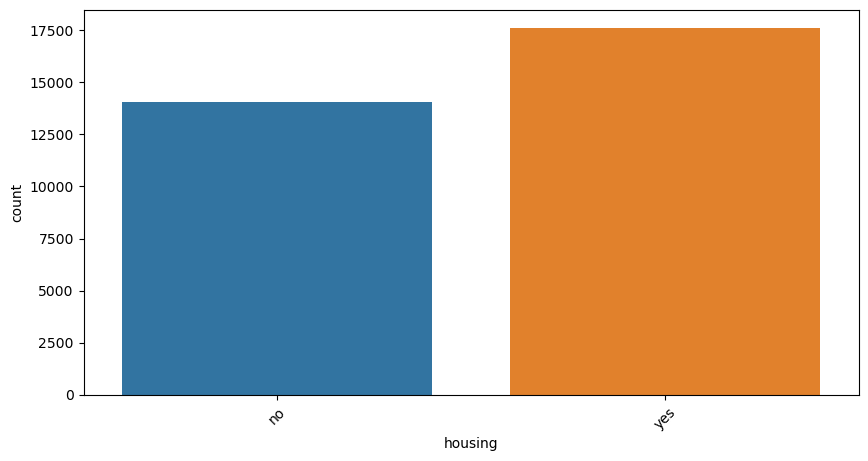

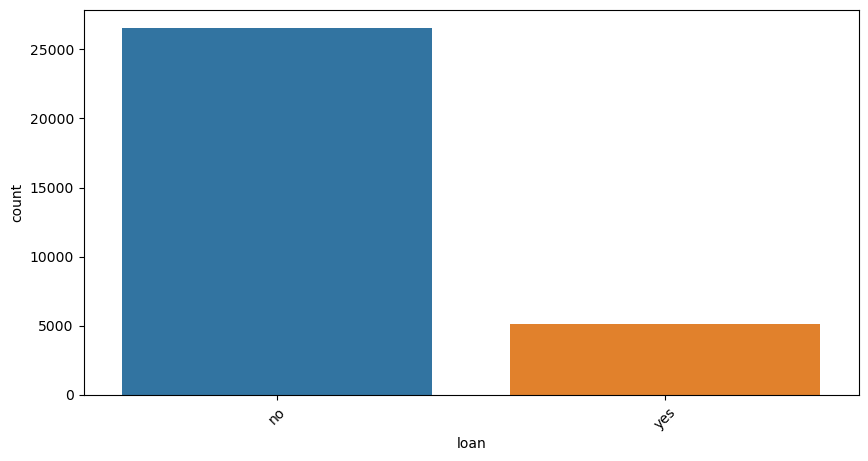

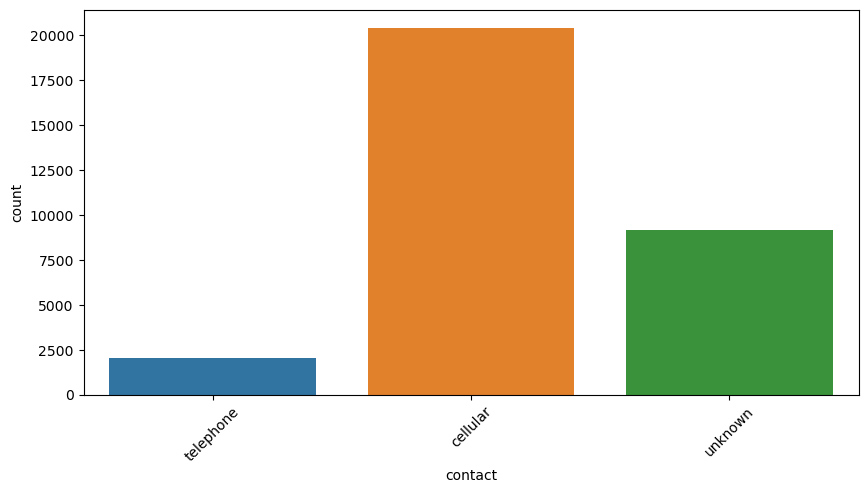

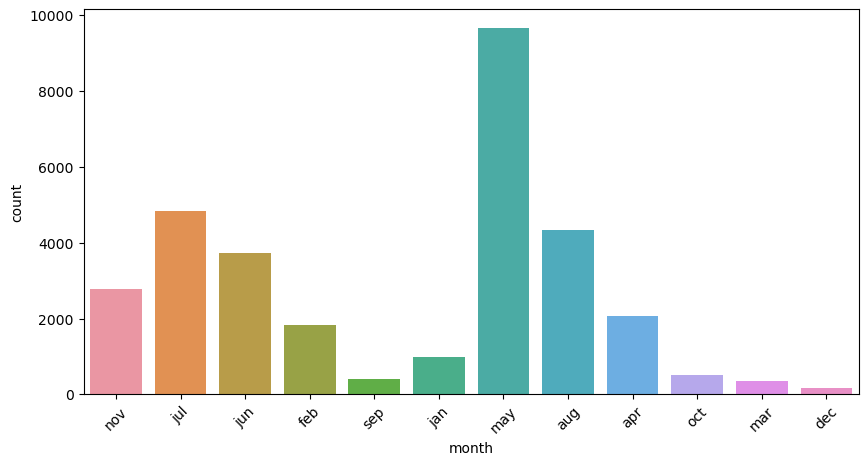

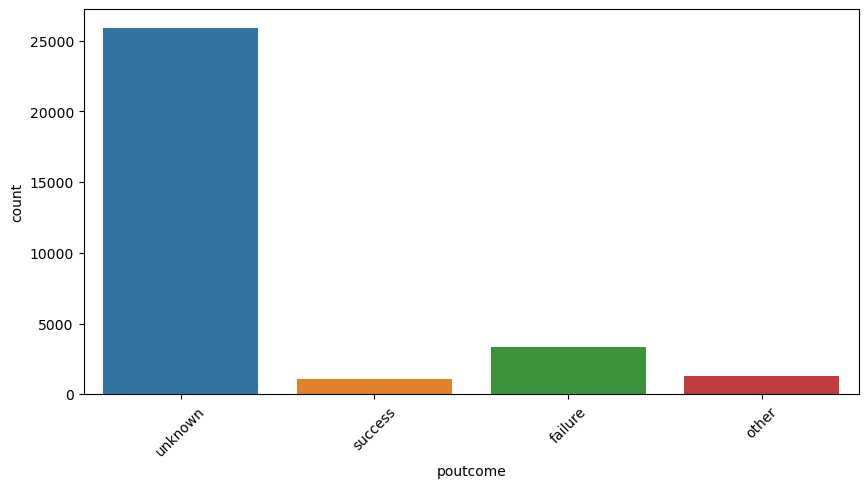

In [79]:
#For Train Dataset
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.show()

##### These are the counts of every category of the categorical feature in the Train Dataset.

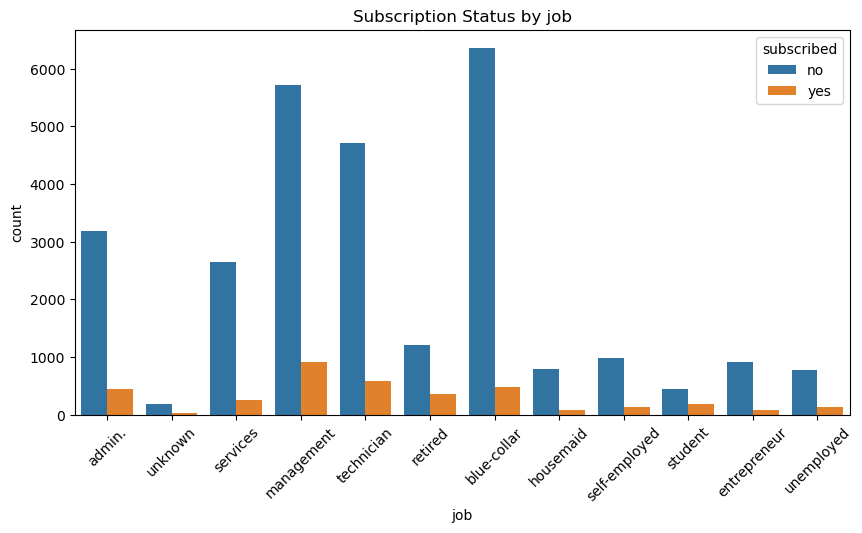

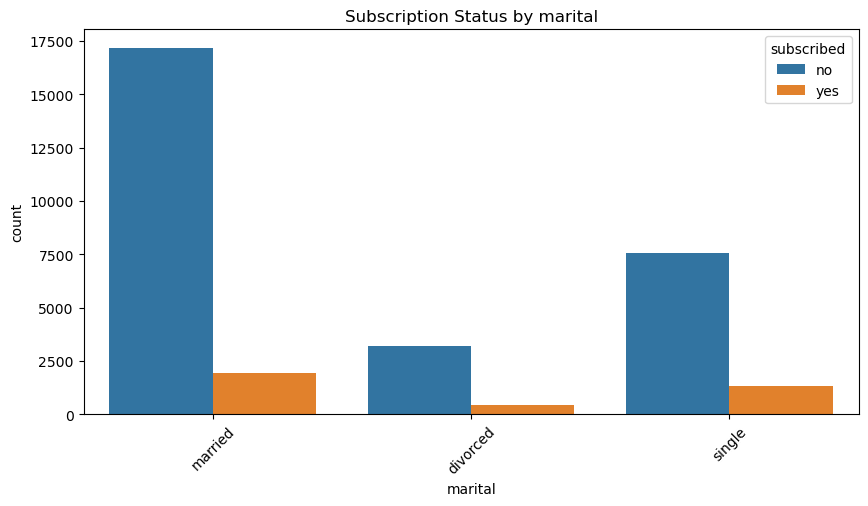

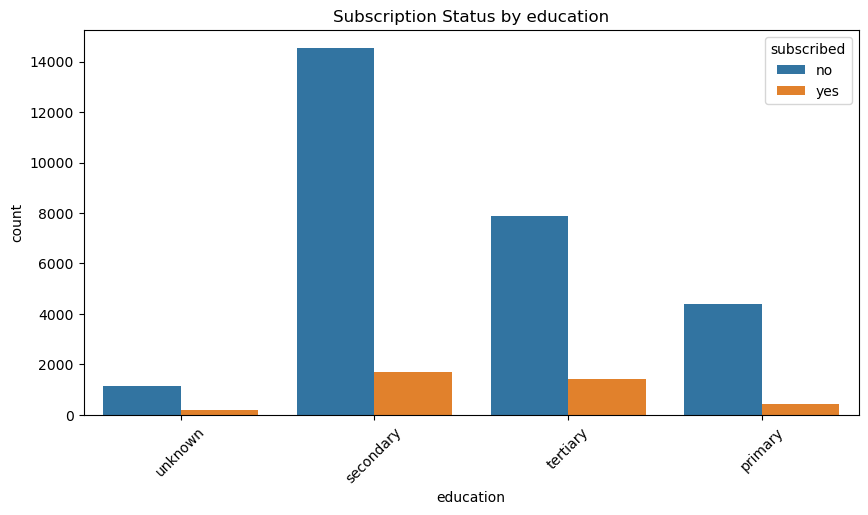

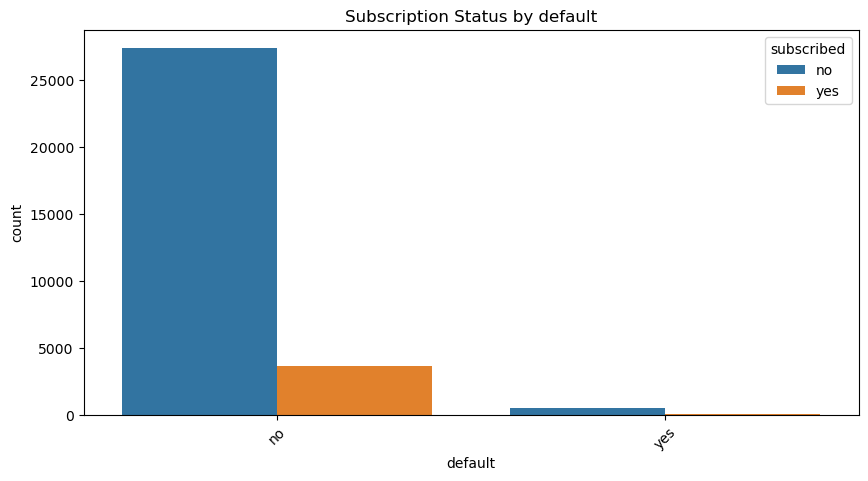

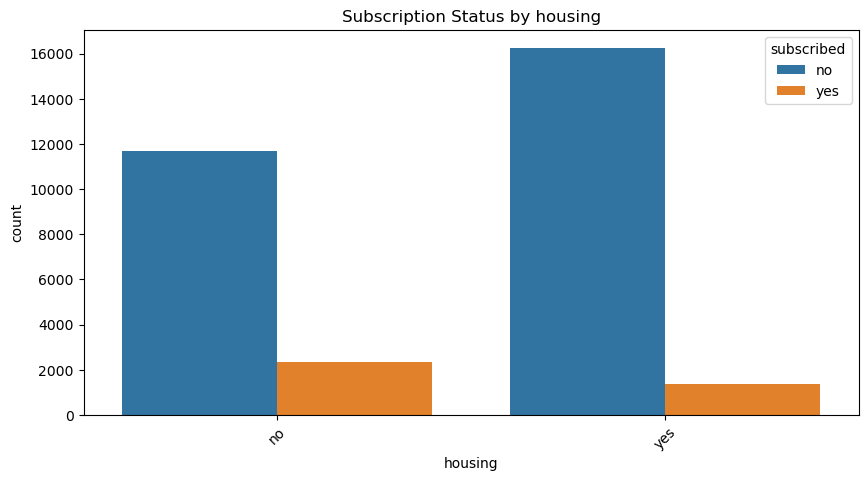

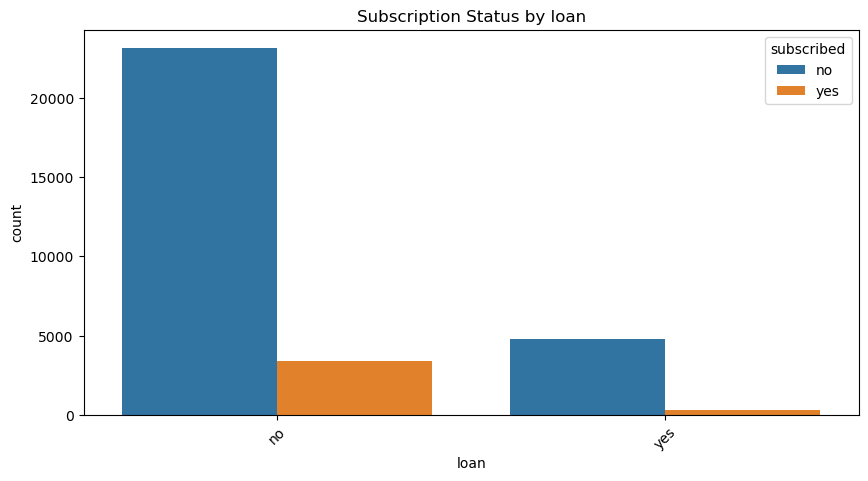

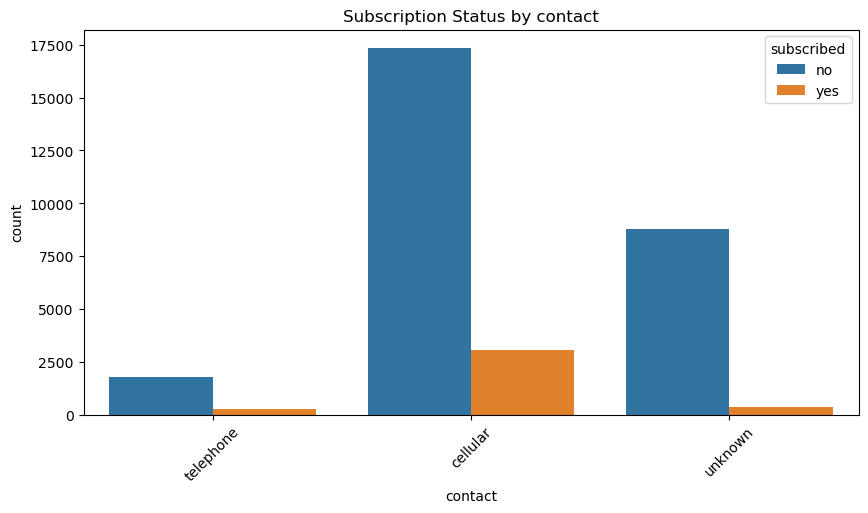

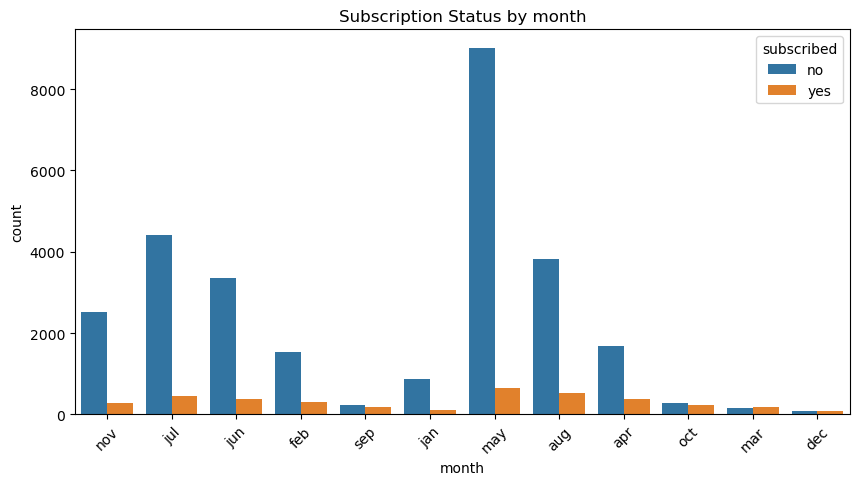

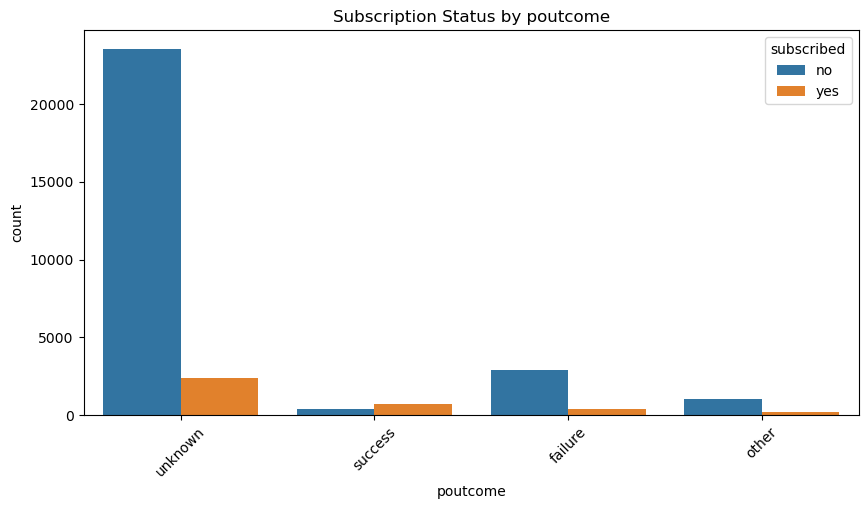

In [80]:
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue='subscribed')
    plt.title(f'Subscription Status by {feature}')
    plt.xticks(rotation=45)
    plt.show()

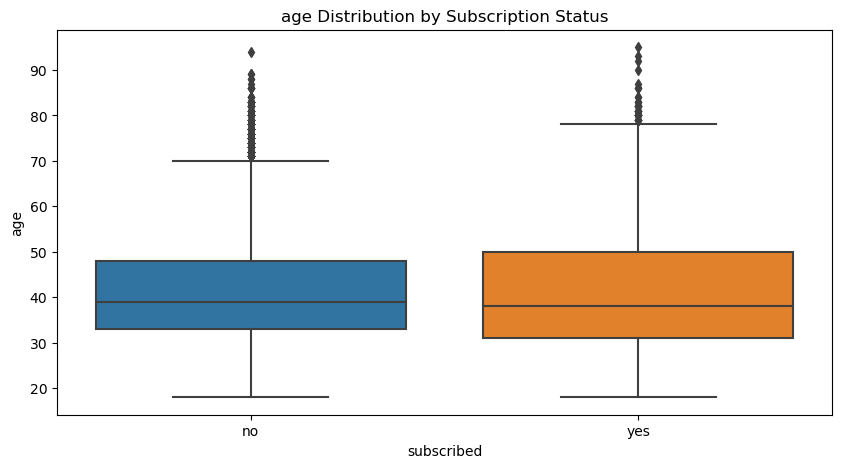

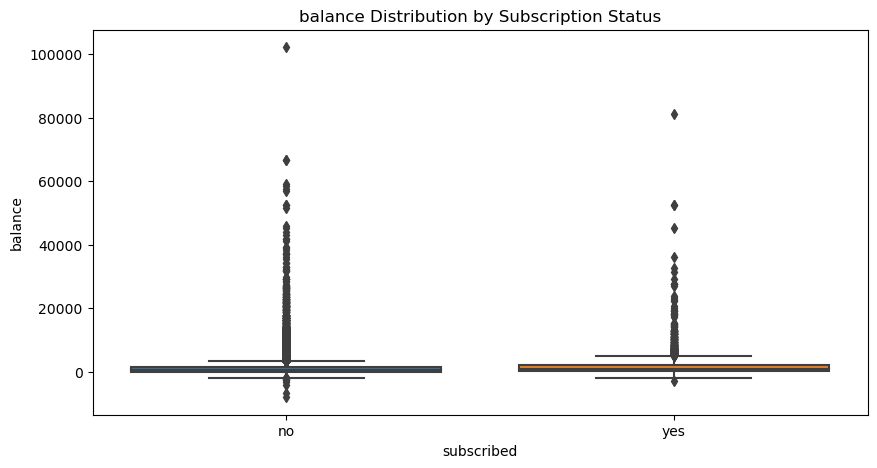

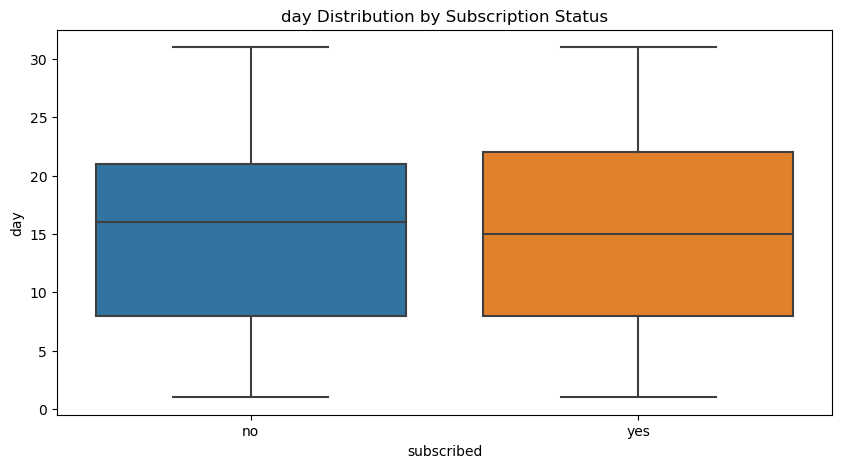

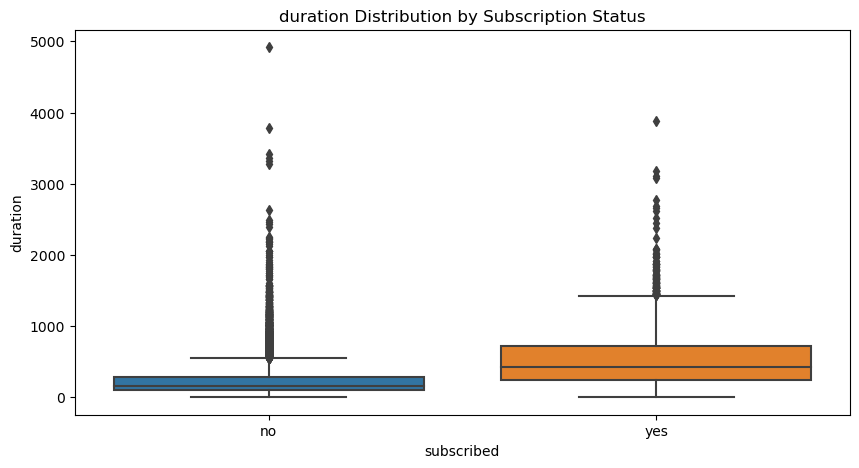

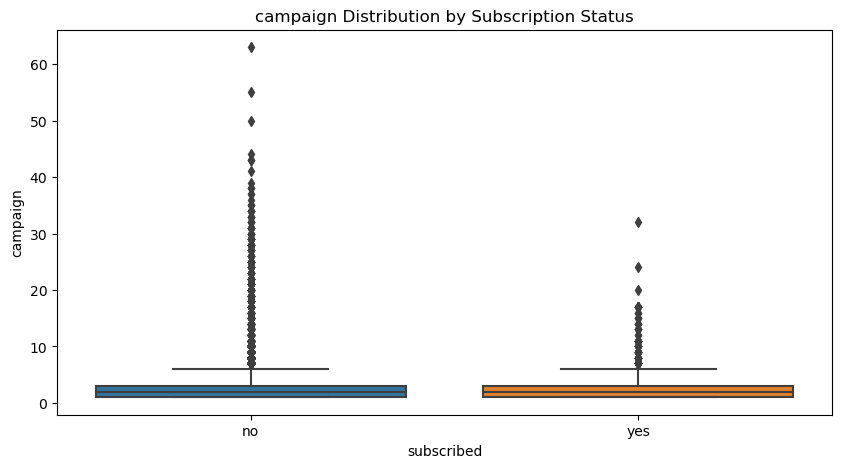

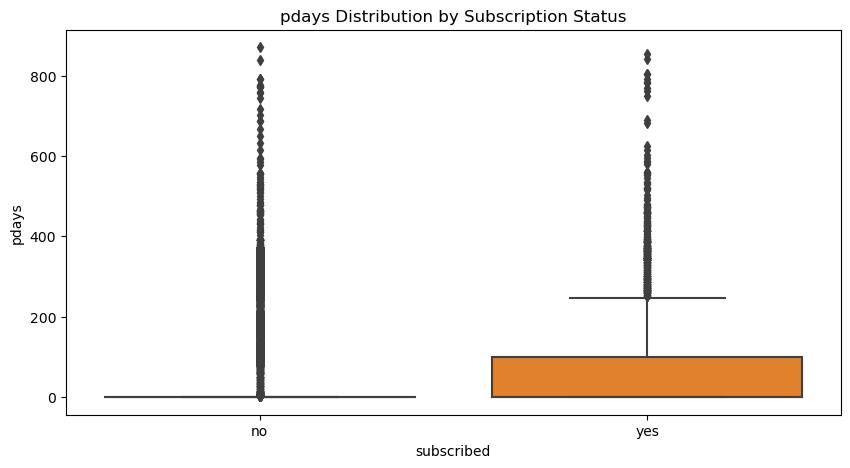

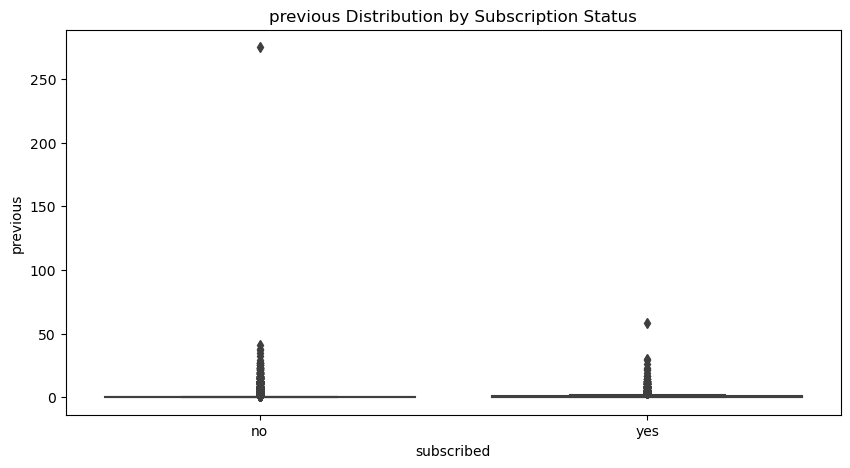

In [81]:
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='subscribed', y=feature)
    plt.title(f'{feature} Distribution by Subscription Status')
    plt.show()

##### These are the counts of every category of the categorical feature in the Train Dataset.

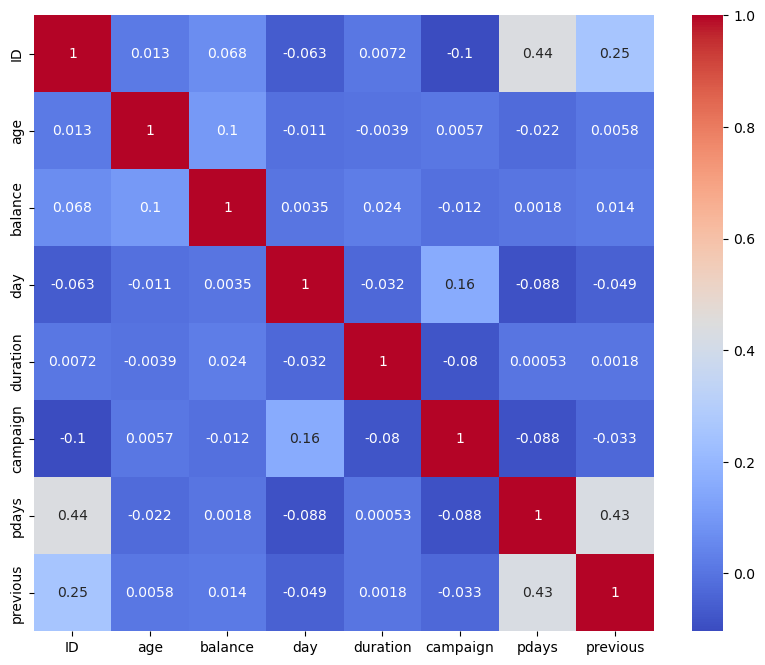

In [82]:
train_corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(train_corr_matrix, annot=True, cmap='coolwarm')
plt.show()

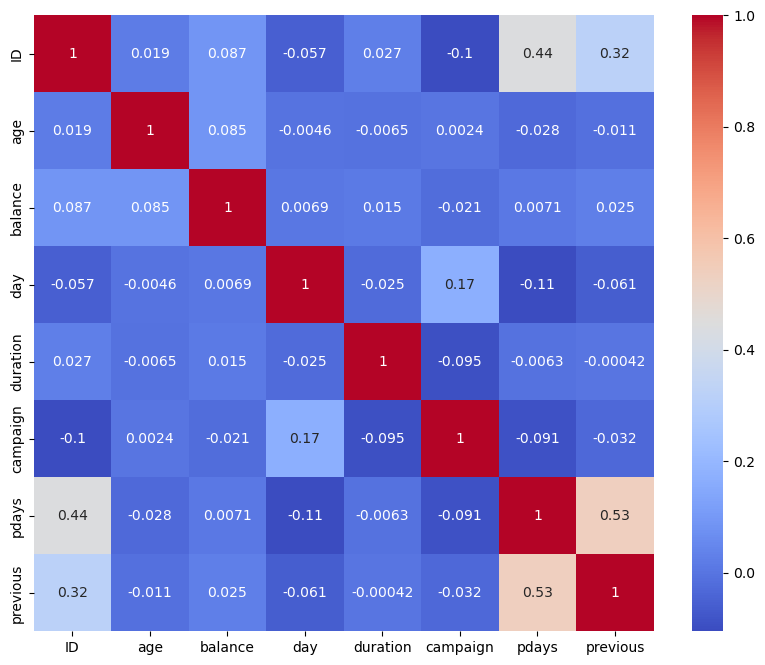

In [83]:
test_corr_matrix = df_test.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(test_corr_matrix, annot=True, cmap='coolwarm')
plt.show()

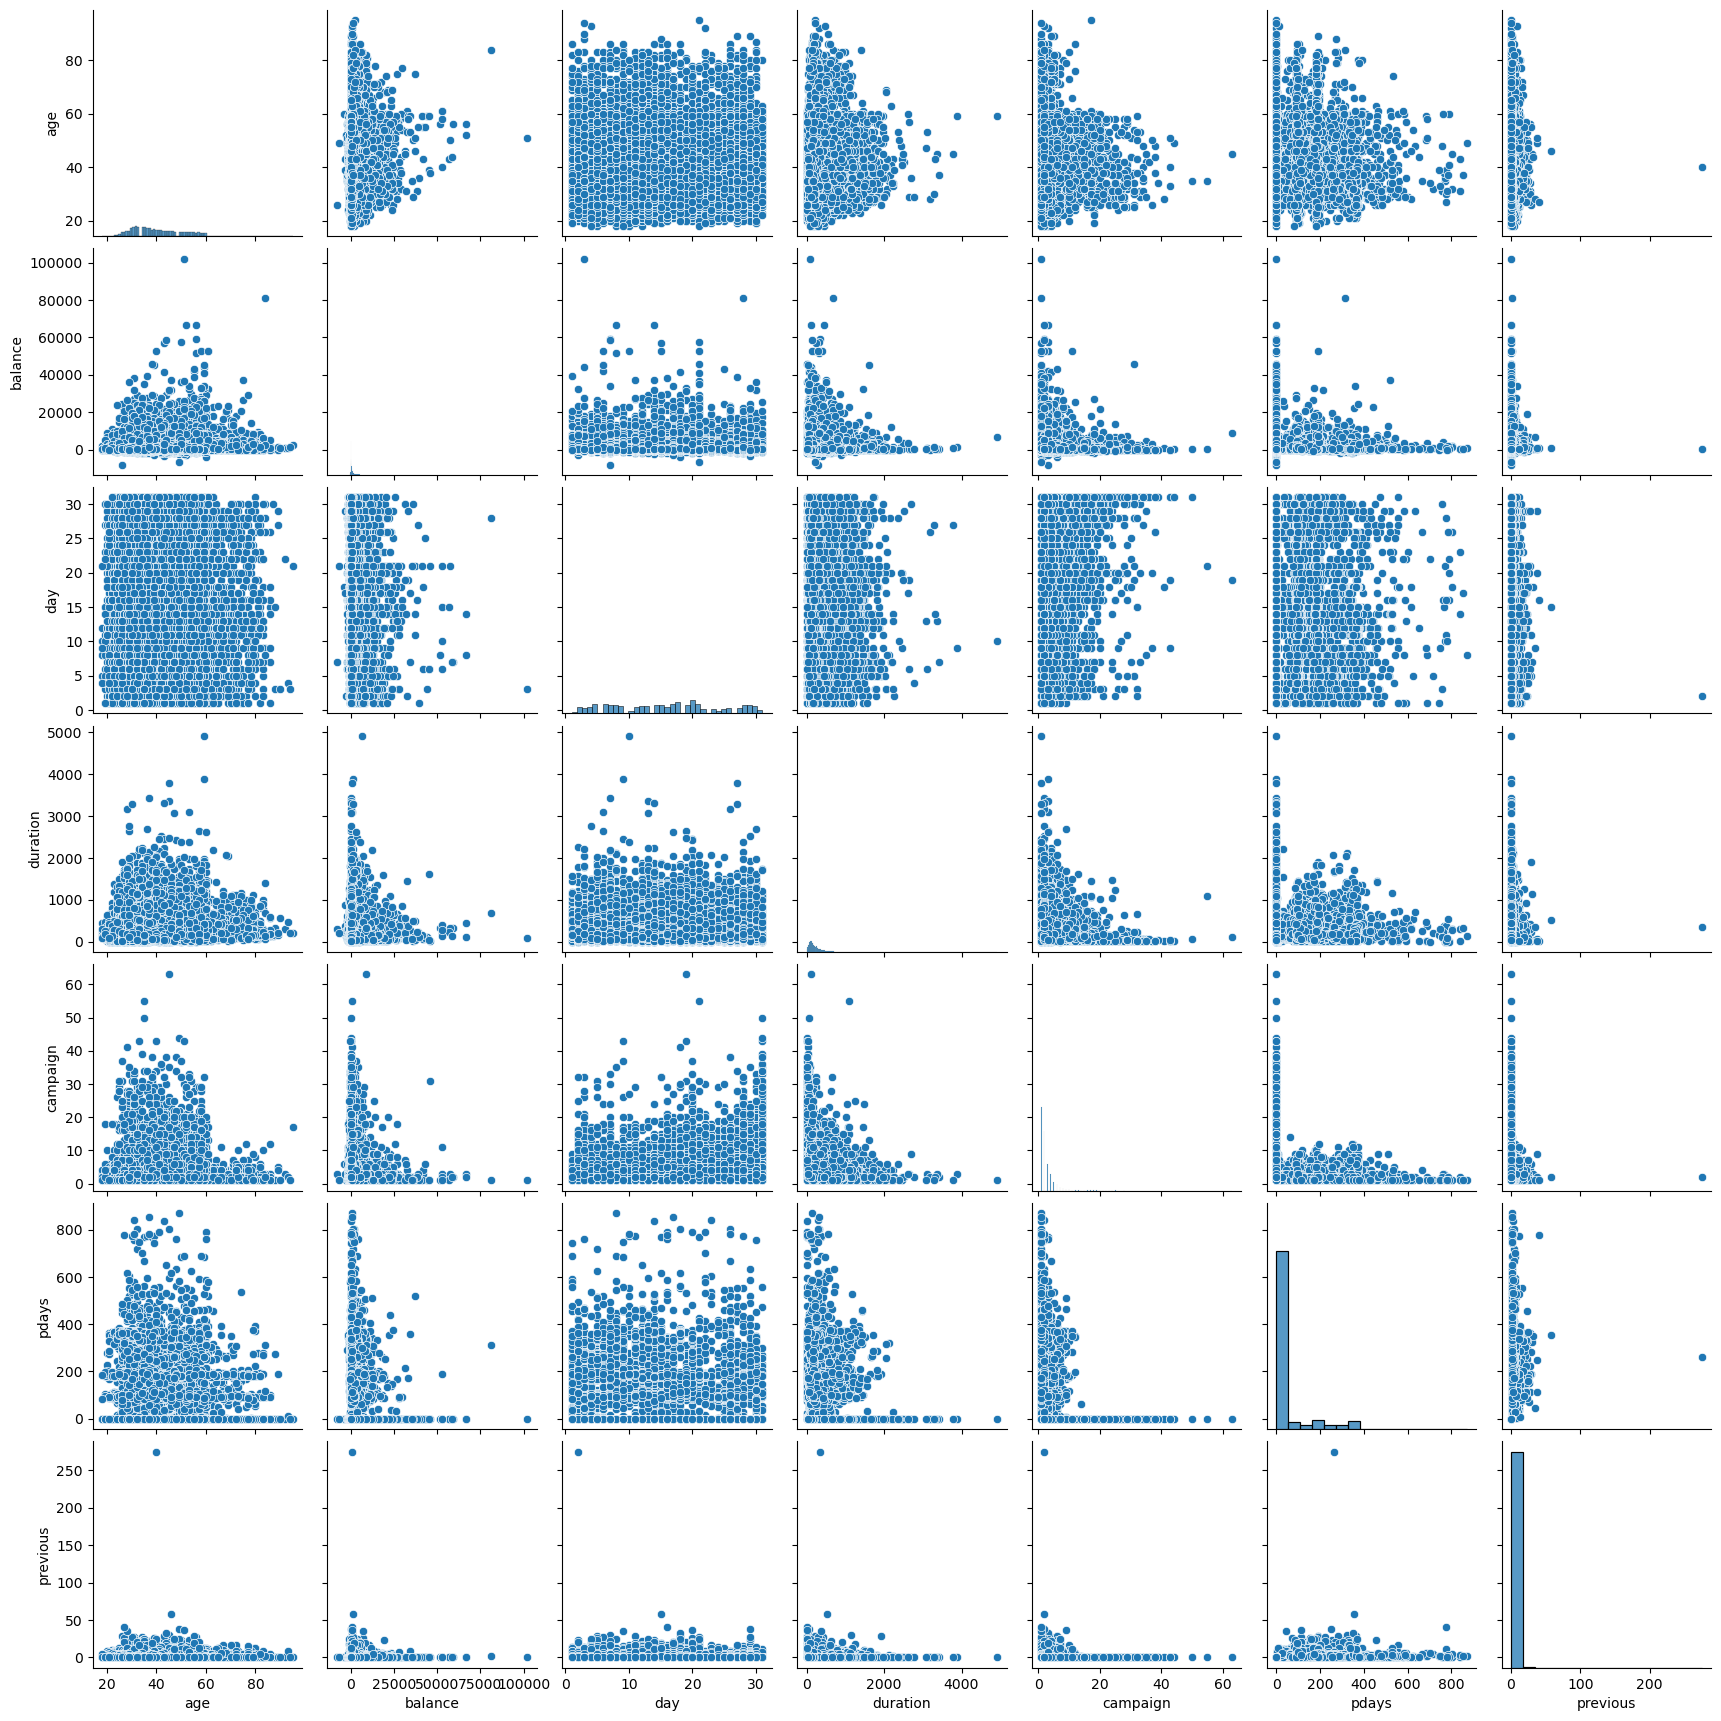

In [84]:
sns.pairplot(df[numerical_features])
plt.show()

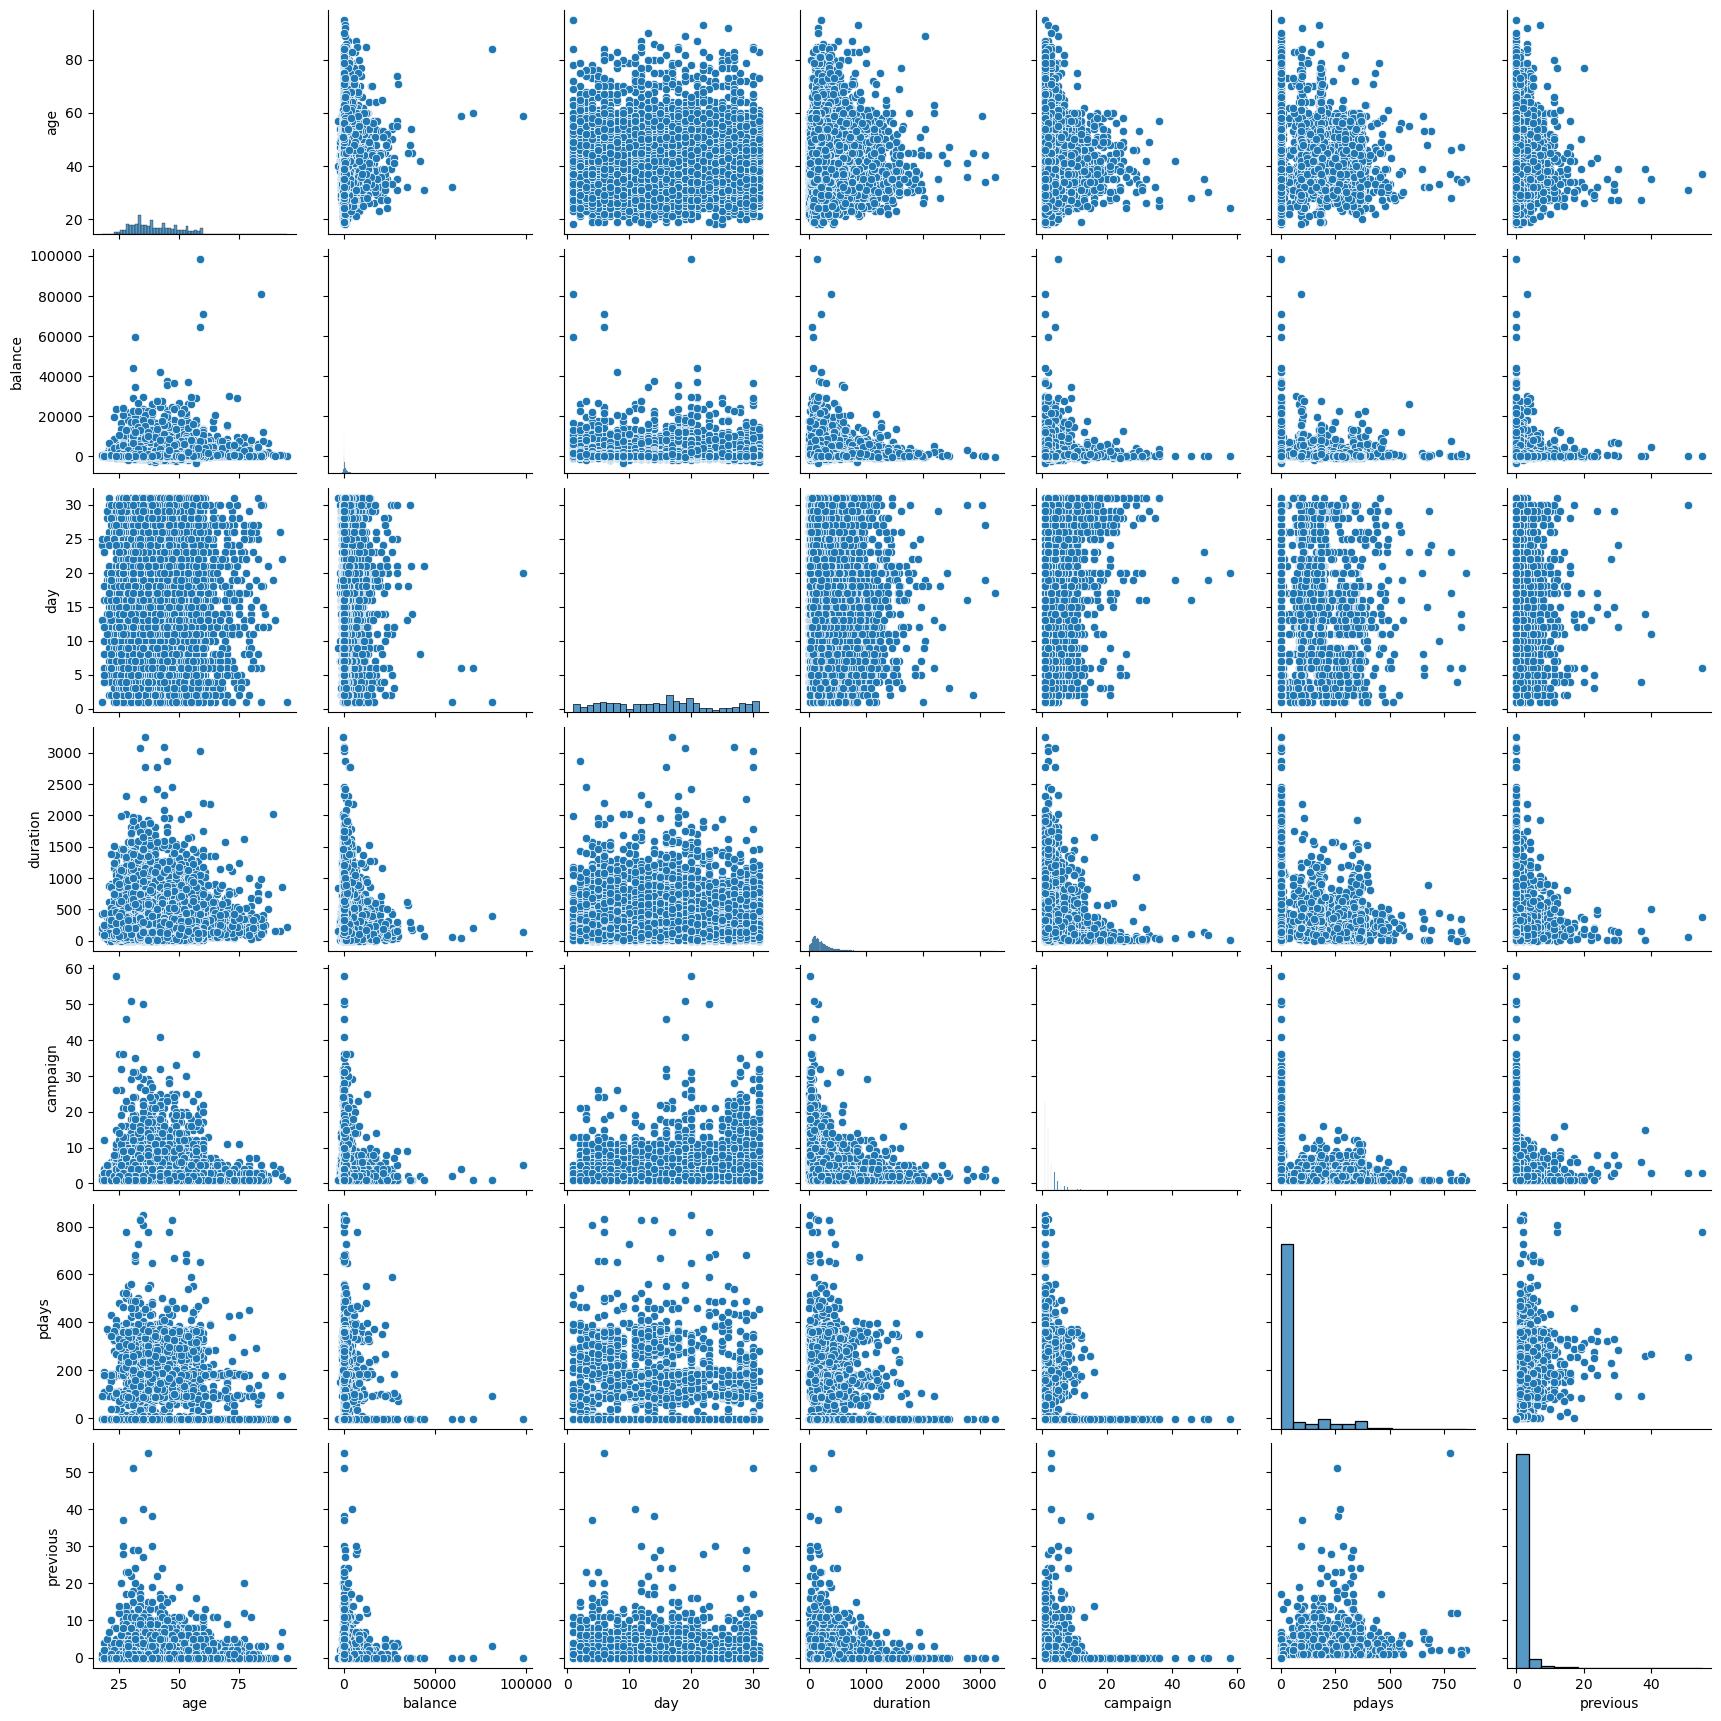

In [85]:
sns.pairplot(df_test[numerical_features])
plt.show()

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [87]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


### Skewness

In [88]:
from scipy import stats
columns_to_transform = ['balance', 'campaign', 'pdays', 'previous']
for col in columns_to_transform:
    min_value = min(df[col].min(), df_test[col].min())
    if min_value <= 0:
        shift_value = abs(min_value) + 1
        df[col] += shift_value
        df_test[col] += shift_value
    df[col], _ = stats.boxcox(df[col])
    df_test[col], _ = stats.boxcox(df_test[col])

In [89]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df_test[numerical_features] = scaler.transform(df_test[numerical_features])


In [90]:
df_test.skew()

ID         -0.013625
age         0.692404
balance     0.000000
day         0.106806
duration    3.017221
campaign    0.167140
pdays       1.609664
previous    1.610955
dtype: float64

In [91]:
df.skew()

ID          0.005851
age         0.681607
balance    -0.095588
day         0.087185
duration    3.199766
campaign    0.165947
pdays       1.660813
previous    1.661485
dtype: float64

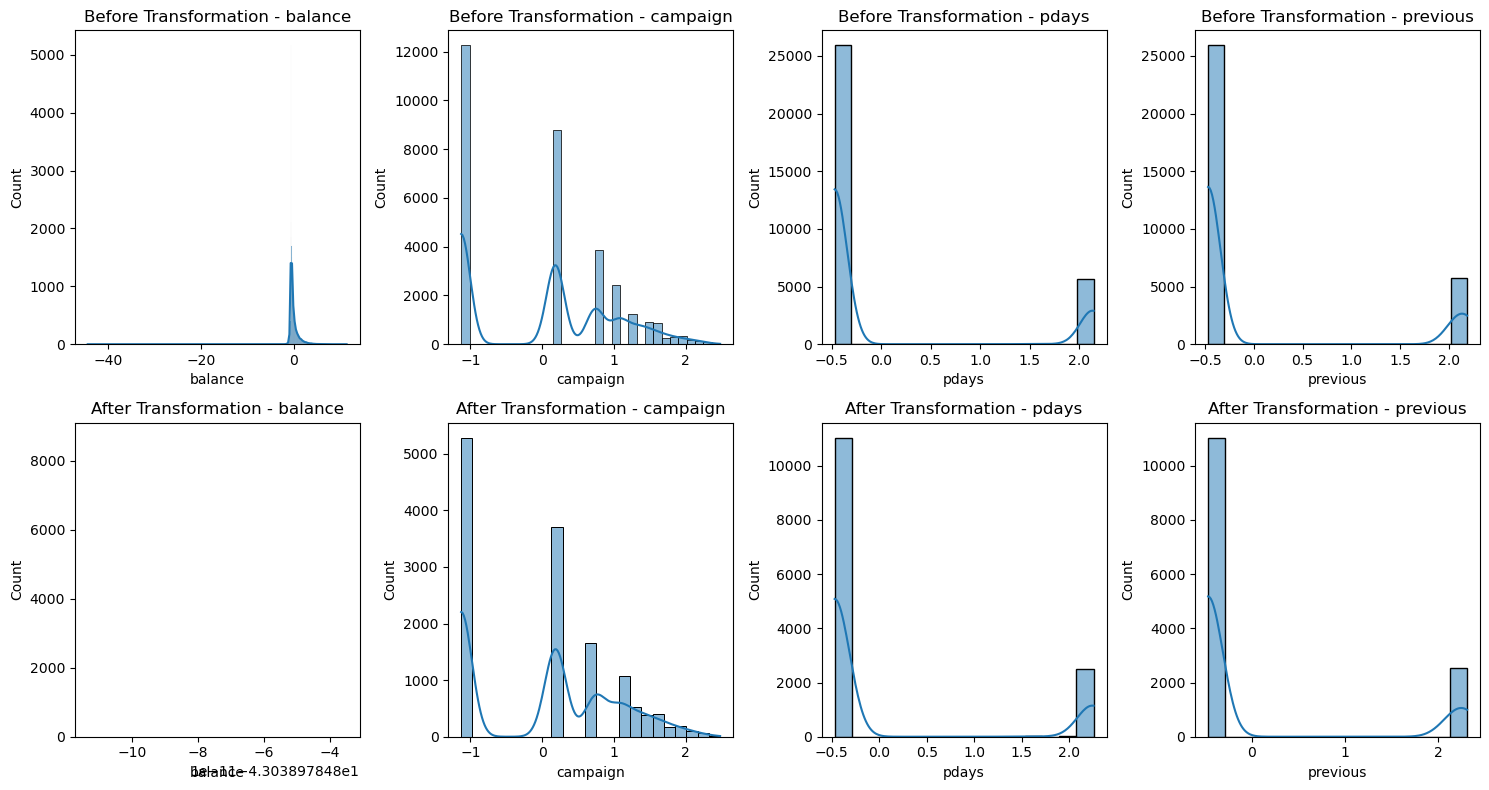

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=len(columns_to_transform), figsize=(15, 8))

for i, col in enumerate(columns_to_transform):
    sns.histplot(df[col], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Before Transformation - {col}')
    sns.histplot(df_test[col], kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'After Transformation - {col}')

plt.tight_layout()
plt.show()

###### The graphs show that the original distributions (top row) for balance, pdays, and previous are highly skewed, as evidenced by their skewed shapes. After applying the Box-Cox transformation (bottom row), the distributions become more symmetric, indicating a significant reduction in skewness and a more normalized data distribution.

## Preprocessing

In [97]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
target = 'subscribed'
X = df.drop(target, axis=1)
y = df[target]
y = LabelEncoder().fit_transform(y)



In [98]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough') 
X_preprocessed = preprocessor.fit_transform(X)
X_test = df_test.copy() 
X_test_preprocessed = preprocessor.transform(X_test)

# Modeling

In [99]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_preprocessed, y)
knn_predictions = knn.predict(X_test_preprocessed)

In [100]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_preprocessed, y)
lin_reg_predictions = lin_reg.predict(X_test_preprocessed)
lin_reg_predictions_binary = (lin_reg_predictions > 0.5).astype(int)


In [102]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_preprocessed, y)
log_reg_predictions = log_reg.predict(X_test_preprocessed)


In [103]:
df_test['subscribed_knn'] = knn_predictions
df_test['subscribed_log_reg'] = log_reg_predictions
df_test['subscribed_lin_reg'] = lin_reg_predictions_binary
df_test[['ID', 'subscribed_knn', 'subscribed_log_reg', 'subscribed_lin_reg']].to_csv('predictions.csv', index=False)

In [107]:
print("Subscribed using KNN")
df_test['subscribed_knn']

Subscribed using KNN


0        0
1        0
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed_knn, Length: 13564, dtype: int32

In [110]:
print("Subscribed using Linear Regression")
df_test['subscribed_lin_reg']

Subscribed using Linear Regression


0        0
1        0
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    0
13563    0
Name: subscribed_lin_reg, Length: 13564, dtype: int32

In [111]:
print("Subscribed using Linear Regression")
df_test['subscribed_log_reg']

Subscribed using Linear Regression


0        0
1        0
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    0
13563    0
Name: subscribed_log_reg, Length: 13564, dtype: int32

In [112]:
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed_knn,subscribed_log_reg,subscribed_lin_reg
0,38441,-0.843038,services,married,secondary,no,-43.038978,yes,no,cellular,-0.100212,may,-0.926098,1.441978,-0.469691,-0.469673,unknown,0,0,0
1,40403,3.486388,retired,divorced,primary,no,-43.038978,no,no,telephone,-1.779480,jul,0.442940,-1.126753,-0.469691,-0.469673,unknown,0,0,0
2,3709,-0.937156,self-employed,single,tertiary,no,-43.038978,yes,no,unknown,0.019735,may,1.625291,-1.126753,-0.469691,-0.469673,unknown,0,0,0
3,37422,1.509911,services,single,primary,no,-43.038978,yes,no,telephone,-0.340108,may,-0.751079,0.186844,-0.469691,-0.469673,unknown,0,0,0
4,12527,0.380496,blue-collar,divorced,secondary,no,-43.038978,no,yes,unknown,-1.539585,jul,-0.572170,-1.126753,-0.469691,-0.469673,unknown,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,-0.184212,management,married,tertiary,no,-43.038978,no,no,cellular,1.459108,aug,-0.428266,1.067992,-0.469691,-0.469673,unknown,0,0,0
13560,11743,1.227557,blue-collar,married,primary,no,-43.038978,yes,no,unknown,0.499526,jun,-0.389373,-1.126753,-0.469691,-0.469673,unknown,0,0,0
13561,28292,-0.560684,retired,married,primary,no,-43.038978,yes,no,cellular,1.579056,jan,-0.474938,-1.126753,-0.469691,-0.469673,unknown,0,0,0
13562,45163,-1.125392,admin.,single,secondary,no,-43.038978,no,no,cellular,-0.819899,nov,-0.194907,0.186844,2.226932,2.298022,success,1,0,0


###### "I trained the K-Nearest Neighbors (KNN), Linear Regression, and Logistic Regression models using the training data from df, and then used these trained models to predict the subscribed column for the df_test dataset."